## 千葉県の人口データと就職者数データ


　　人口データ2015年と2020年


In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
# mpl.rc('font',family='MS Gothic')

In [2]:
# 空間データなので geopandas (gpd) でインポート

chibamesh1 = gpd.read_file('data/SDDSWS5239')
chibamesh2 = gpd.read_file('data/SDDSWS5240')
chibamesh3 = gpd.read_file('data/SDDSWS5339')
chibamesh4 = gpd.read_file('data/SDDSWS5340')

In [3]:
# combine all four mesh shapes
chibamesh = gpd.pd.concat([chibamesh1,chibamesh2,chibamesh3,chibamesh4])

<Axes: >

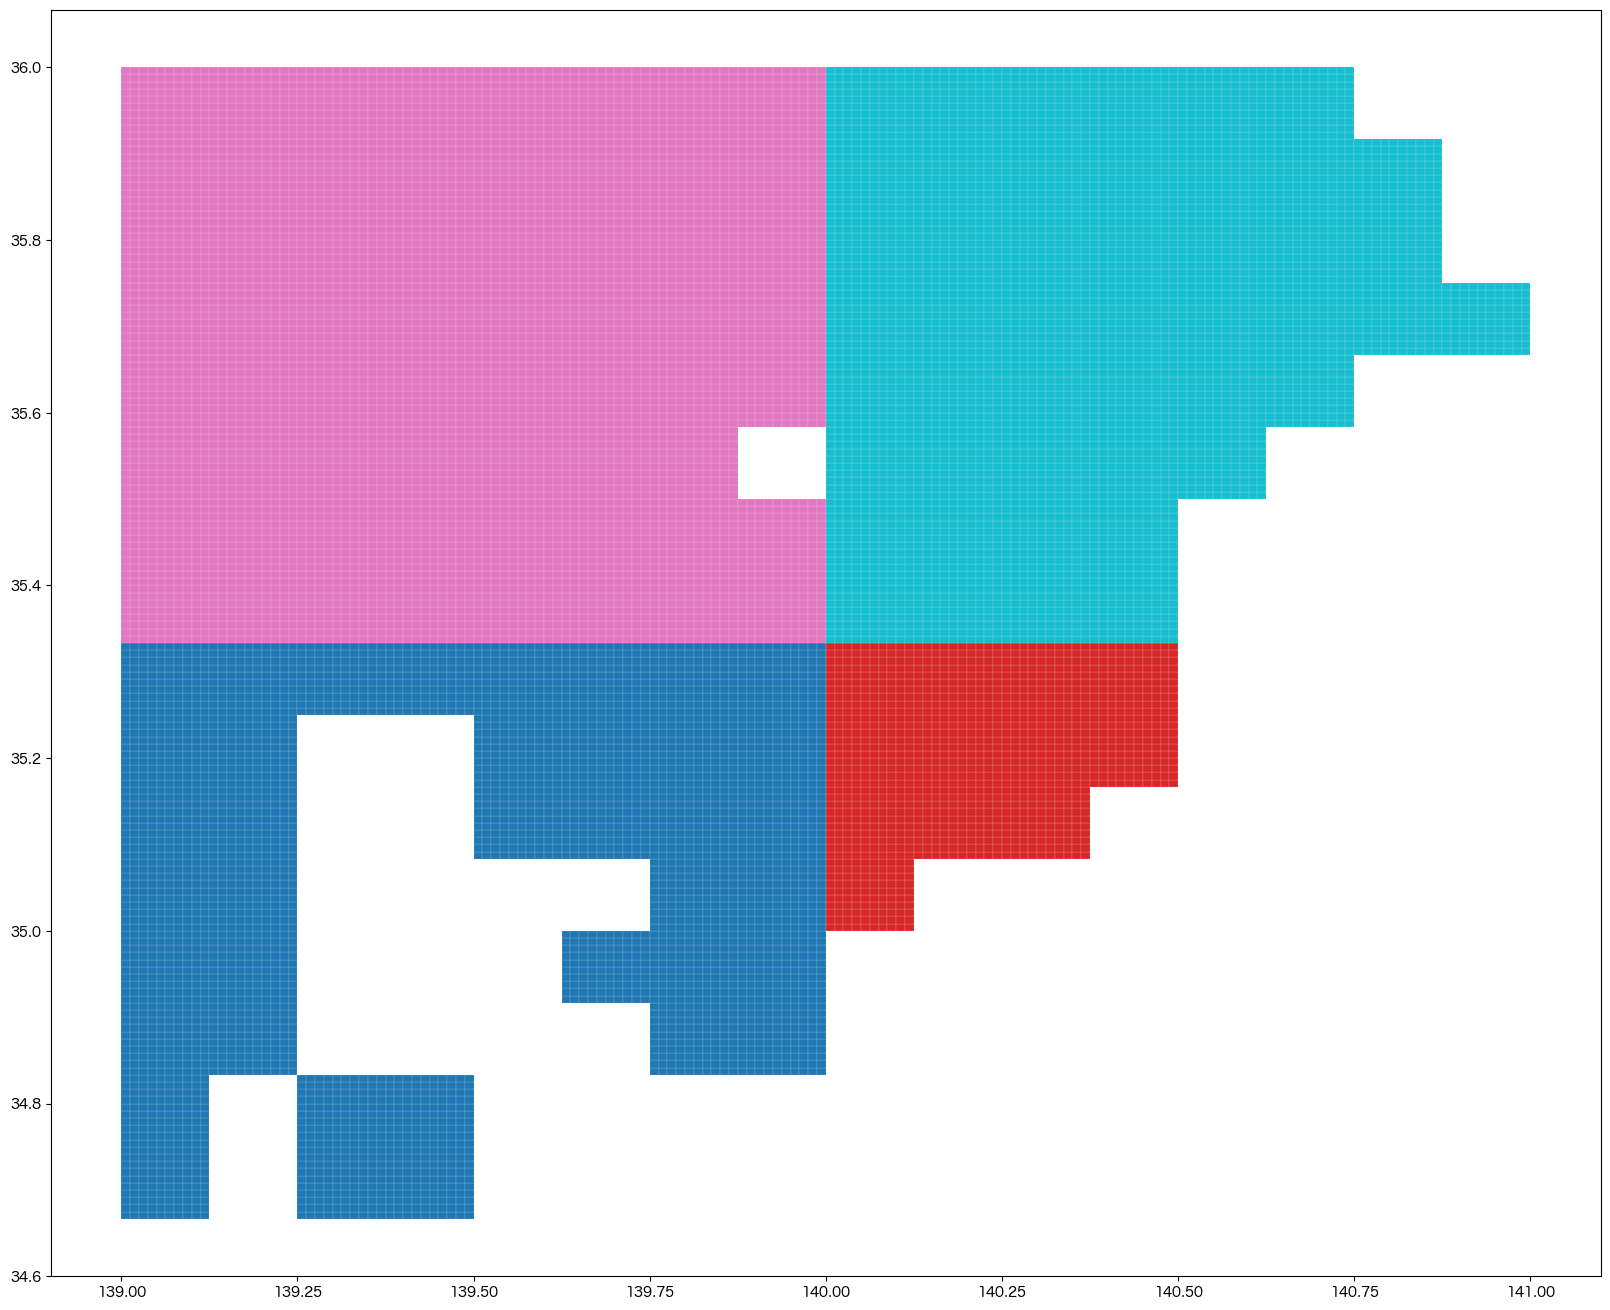

In [4]:
# quick plot
chibamesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1,column='MESH1_ID')

In [5]:
# csvデータなので pandas (pd) でインポート
# 文字化け予防のために encoding='cp932' 
chibadata1 = pd.read_csv('data/tblT001100S5239', encoding='cp932')
chibadata2 = pd.read_csv('data/tblT001100S5240', encoding='cp932')
chibadata3 = pd.read_csv('data/tblT001100S5339', encoding='cp932')
chibadata4 = pd.read_csv('data/tblT001100S5340', encoding='cp932')
chibadata5 = pd.read_csv('data/tblT000846S5239', encoding='cp932')
chibadata6 = pd.read_csv('data/tblT000846S5240', encoding='cp932')
chibadata7 = pd.read_csv('data/tblT000846S5339', encoding='cp932')
chibadata8 = pd.read_csv('data/tblT000846S5340', encoding='cp932')

In [6]:
# check data
chibadata5.head()

KEY_CODE  HTKSYORI     HTKSAKI    GASSAN T000846001 T000846002   
0         NaN       NaN         NaN       NaN      　人口総数    　人口総数　男  \
1  52390090.0       2.0  52391000.0       NaN          5          3   
2  52390248.0       2.0  52390258.0       NaN          2          1   
3  52390249.0       0.0         NaN       NaN         12          7   
4  52390258.0       1.0         NaN  52390248         19          9   

  T000846003  T000846004  T000846005  T000846006  ...   T000846032   
0    　人口総数　女  　０～１４歳人口総数  　０～１４歳人口　男  　０～１４歳人口　女  ...  　６人世帯の一般世帯数  \
1          2           *           *           *  ...            *   
2          1           *           *           *  ...            *   
3          5           1           1           0  ...            0   
4         10           2           1           1  ...            0   

      T000846033   T000846034  T000846035    T000846036        T000846037   
0  　７人以上世帯の一般世帯数  　親族のみの一般世帯数  　核家族の一般世帯数  　核家族以外の一般世帯数  　６歳未満世帯員のいる一般世帯数  \
1              *            *           *             *                 *   
2              *            *           *             *                 *   
3              0            3           3             0                 0   
4              0            4           3             1                 0   

          T000846038                 T000846039   T000846040     T000846041  
0  　６５歳以上世帯員のいる一般世帯数  　世帯主の年齢が２０～２９歳の１人世帯の一般世帯数  　高齢単身の一般世帯数  　高齢夫婦のみの一般世帯数  
1                  *                          *            *              *  
2                  *                          *            *              *  
3                  2                          0            1              0  
4                  2                          5            0              1  

[5 rows x 45 columns]

In [7]:
# 8つのテーブルから１行目を削除
chibadata1 = chibadata1[1:]
chibadata2 = chibadata2[1:]
chibadata3 = chibadata3[1:]
chibadata4 = chibadata4[1:]
chibadata5 = chibadata5[1:]
chibadata6 = chibadata6[1:]
chibadata7 = chibadata7[1:]
chibadata8 = chibadata8[1:]

In [8]:
# ４つのテーブルから「＊」を非数に置き換える
chibadata1 = chibadata1.replace('*',np.nan)
chibadata2 = chibadata2.replace('*',np.nan)
chibadata3 = chibadata3.replace('*',np.nan)
chibadata4 = chibadata4.replace('*',np.nan)
chibadata5 = chibadata5.replace('*',np.nan)
chibadata6 = chibadata6.replace('*',np.nan)
chibadata7 = chibadata7.replace('*',np.nan)
chibadata8 = chibadata8.replace('*',np.nan)

In [9]:
chibadata2020 = pd.concat([chibadata1,chibadata2,chibadata3,chibadata4])

In [10]:
chibadata2015 = pd.concat([chibadata5,chibadata6,chibadata7,chibadata8])

In [11]:
chibadata2015.head()

KEY_CODE  HTKSYORI     HTKSAKI    GASSAN T000846001 T000846002   
1  52390090.0       2.0  52391000.0       NaN          5          3  \
2  52390248.0       2.0  52390258.0       NaN          2          1   
3  52390249.0       0.0         NaN       NaN         12          7   
4  52390258.0       1.0         NaN  52390248         19          9   
5  52390259.0       0.0         NaN       NaN         12          6   

  T000846003 T000846004 T000846005 T000846006  ... T000846032 T000846033   
1          2        NaN        NaN        NaN  ...        NaN        NaN  \
2          1        NaN        NaN        NaN  ...        NaN        NaN   
3          5          1          1          0  ...          0          0   
4         10          2          1          1  ...          0          0   
5          6          1          1          0  ...          0          0   

  T000846034 T000846035 T000846036 T000846037 T000846038 T000846039   
1        NaN        NaN        NaN        NaN        NaN        NaN  \
2        NaN        NaN        NaN        NaN        NaN        NaN   
3          3          3          0          0          2          0   
4          4          3          1          0          2          5   
5          4          4          0          1          4          0   

  T000846040 T000846041  
1        NaN        NaN  
2        NaN        NaN  
3          1          0  
4          0          1  
5          2          1  

[5 rows x 45 columns]

In [12]:
# get rid of HTKSYORI, HTKSAKI, GASSAN
columns=['HTKSYORI','HTKSAKI','GASSAN']
chibadata2015=chibadata2015.drop(columns=columns)

In [13]:
chibadata2020=chibadata2020.drop(columns=columns)

In [14]:
# combine 2015 and 2020 data
chibadata = pd.merge(chibadata2020,chibadata2015,on='KEY_CODE')

In [15]:
# check data info
chibadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10301 entries, 0 to 10300
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    10301 non-null  float64
 1   T001100001  10301 non-null  object 
 2   T001100002  10301 non-null  object 
 3   T001100003  10301 non-null  object 
 4   T001100004  9878 non-null   object 
 5   T001100005  9878 non-null   object 
 6   T001100006  9878 non-null   object 
 7   T001100007  9878 non-null   object 
 8   T001100008  9878 non-null   object 
 9   T001100009  9878 non-null   object 
 10  T001100010  9878 non-null   object 
 11  T001100011  9878 non-null   object 
 12  T001100012  9878 non-null   object 
 13  T001100013  9878 non-null   object 
 14  T001100014  9878 non-null   object 
 15  T001100015  9878 non-null   object 
 16  T001100016  9878 non-null   object 
 17  T001100017  9878 non-null   object 
 18  T001100018  9878 non-null   object 
 19  T001100019  9878 non-null

In [16]:
# まずはカラムをアウトプット
chibadata.columns

Index(['KEY_CODE', 'T001100001', 'T001100002', 'T001100003', 'T001100004',
       'T001100005', 'T001100006', 'T001100007', 'T001100008', 'T001100009',
       'T001100010', 'T001100011', 'T001100012', 'T001100013', 'T001100014',
       'T001100015', 'T001100016', 'T001100017', 'T001100018', 'T001100019',
       'T001100020', 'T001100021', 'T001100022', 'T001100023', 'T001100024',
       'T001100025', 'T001100026', 'T001100027', 'T001100028', 'T001100029',
       'T001100030', 'T001100031', 'T001100032', 'T001100033', 'T001100034',
       'T001100035', 'T001100036', 'T001100037', 'T001100038', 'T001100039',
       'T001100040', 'T001100041', 'T001100042', 'T001100043', 'T001100044',
       'T001100045', 'T001100046', 'T001100047', 'T001100048', 'T001100049',
       'T001100050', 'T000846001', 'T000846002', 'T000846003', 'T000846004',
       'T000846005', 'T000846006', 'T000846007', 'T000846008', 'T000846009',
       'T000846010', 'T000846011', 'T000846012', 'T000846013', 'T000846014',
 

In [17]:
# 1番目以降をアウトプット
chibadata.columns[1:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050',
       'T000846001', 'T000846002', 'T000846003', 'T000846004', 'T000846005',
       'T000846006', 'T000846007', 'T000846008', 'T000846009', 'T000846010',
       'T000846011', 'T000846012', 'T000846013', 'T000846014', 'T000846015',

In [18]:
# 元のデータを入れ替える
chibadata[chibadata.columns[1:]]=chibadata[chibadata.columns[1:]].astype(float)

In [19]:
# check!
chibadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10301 entries, 0 to 10300
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    10301 non-null  float64
 1   T001100001  10301 non-null  float64
 2   T001100002  10301 non-null  float64
 3   T001100003  10301 non-null  float64
 4   T001100004  9878 non-null   float64
 5   T001100005  9878 non-null   float64
 6   T001100006  9878 non-null   float64
 7   T001100007  9878 non-null   float64
 8   T001100008  9878 non-null   float64
 9   T001100009  9878 non-null   float64
 10  T001100010  9878 non-null   float64
 11  T001100011  9878 non-null   float64
 12  T001100012  9878 non-null   float64
 13  T001100013  9878 non-null   float64
 14  T001100014  9878 non-null   float64
 15  T001100015  9878 non-null   float64
 16  T001100016  9878 non-null   float64
 17  T001100017  9878 non-null   float64
 18  T001100018  9878 non-null   float64
 19  T001100019  9878 non-null

In [20]:
# KEY_CODEをfloatに
chibamesh['KEY_CODE']=chibamesh['KEY_CODE'].astype(float)

In [21]:
# merge the data
chibamesh = chibamesh.merge(chibadata, on='KEY_CODE')

In [22]:
# check!
chibamesh.sample(5)

KEY_CODE MESH1_ID MESH2_ID MESH3_ID  OBJ_ID   
2225  53390275.0     5339       02       75     276  \
9049  53405438.0     5340       54       38    3139   
5133  53395590.0     5339       55       90    4491   
9673  53406447.0     5340       64       47    3848   
9341  53406105.0     5340       61       05    3506   

                                               geometry  T001100001   
2225  POLYGON ((139.32500 35.39167, 139.31250 35.391...      8652.0  \
9049  POLYGON ((140.61250 35.77500, 140.60000 35.775...       147.0   
5133  POLYGON ((139.63750 35.82500, 139.62500 35.825...      5235.0   
9673  POLYGON ((140.60000 35.86667, 140.58750 35.866...       988.0   
9341  POLYGON ((140.20000 35.83333, 140.18750 35.833...      1040.0   

      T001100002  T001100003  T001100004  ...  T000846032  T000846033   
2225      4331.0      4321.0       897.0  ...        40.0        16.0  \
9049        77.0        70.0        12.0  ...         3.0         4.0   
5133      2770.0      2465.0       631.0  ...        36.0        12.0   
9673       491.0       497.0       105.0  ...        22.0        16.0   
9341       484.0       556.0        51.0  ...         8.0         4.0   

      T000846034  T000846035  T000846036  T000846037  T000846038  T000846039   
2225      1900.0      1696.0       204.0       245.0      1233.0       606.0  \
9049        39.0        22.0        17.0         4.0        34.0         0.0   
5133      1423.0      1289.0       134.0       199.0       807.0       135.0   
9673       272.0       171.0       101.0        29.0       197.0         1.0   
9341       370.0       300.0        70.0        18.0       289.0         1.0   

      T000846040  T000846041  
2225       409.0       319.0  
9049         5.0         6.0  
5133       171.0       240.0  
9673        21.0        35.0  
9341        56.0        89.0  

[5 rows x 97 columns]

In [23]:
# reproject to 3857 (web mercator)
chibamesh = chibamesh.to_crs(3857)

<Axes: >

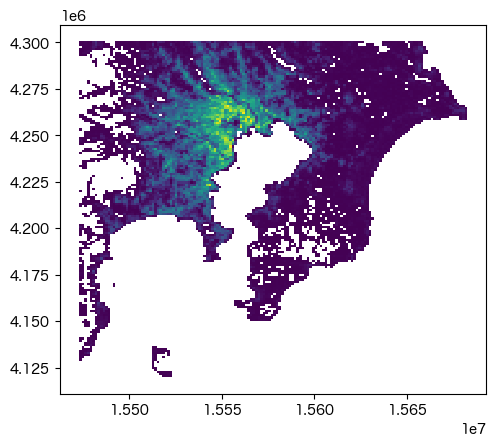

In [24]:
# make a quick plot
chibamesh.plot(column='T001100001')

<Axes: >

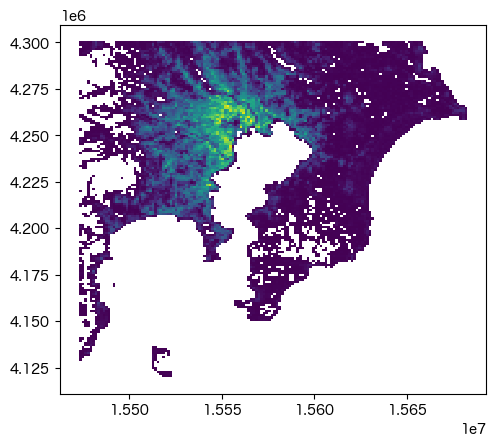

In [25]:
# make a quick plot
chibamesh.plot(column='T000846001')

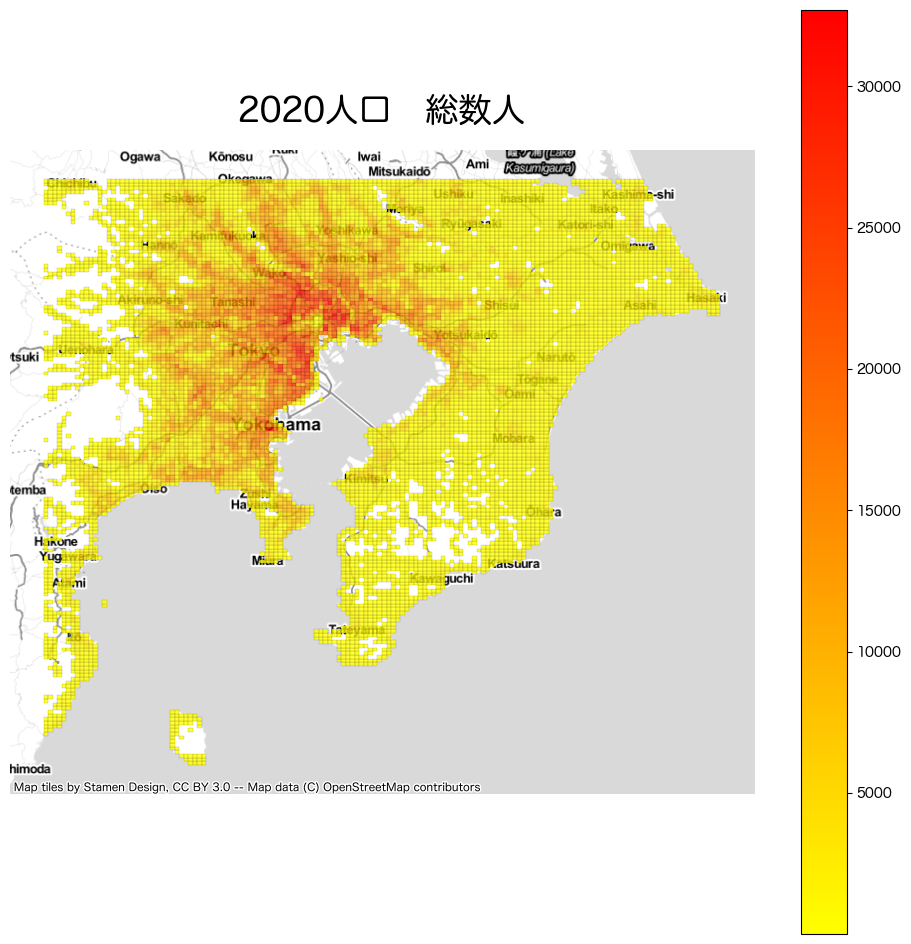

In [26]:
# 2020 population map
ax = chibamesh.plot(figsize=(12,12),
         column='T001100001',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2020人口　総数人',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

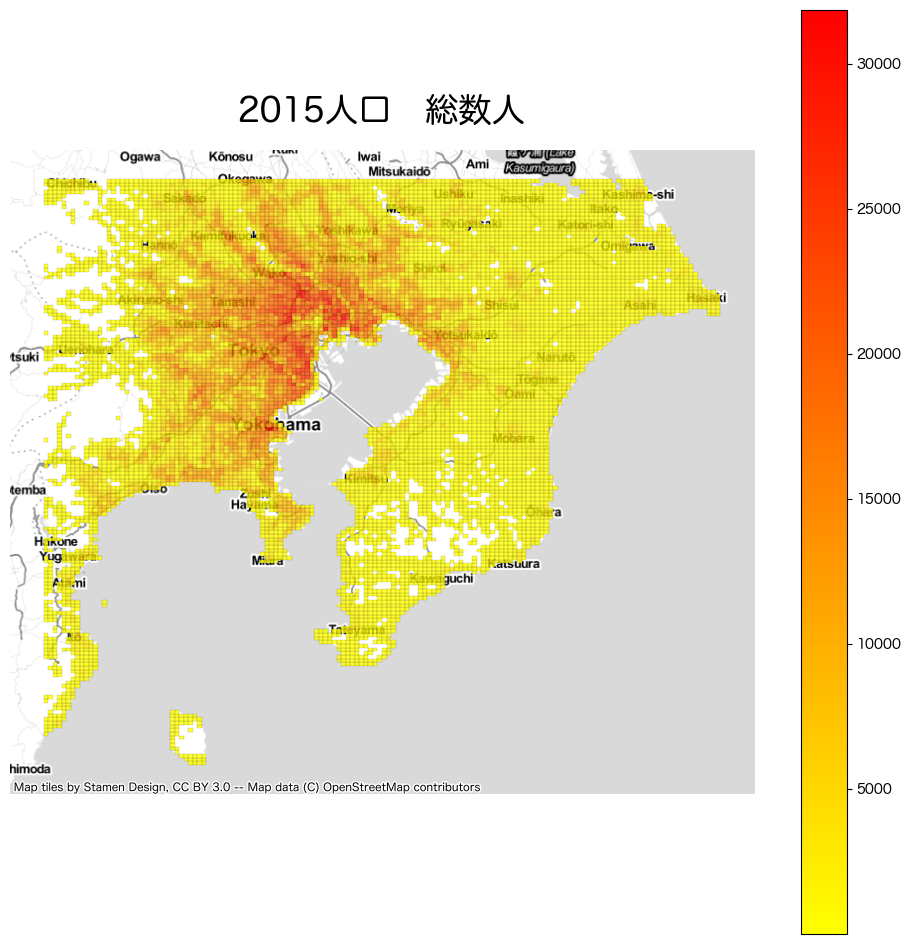

In [33]:
# 2015 population map
ax = chibamesh.plot(figsize=(12,12),
         column='T000846001',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2015人口　総数人',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

In [32]:
# 
ax.set_xlim(chibamesh.total_bounds[0],chibamesh.total_bounds[2])
ax.set_ylim(chibamesh.total_bounds[1],chibamesh.total_bounds[3])

(4119802.184706337, 4300621.372044271)

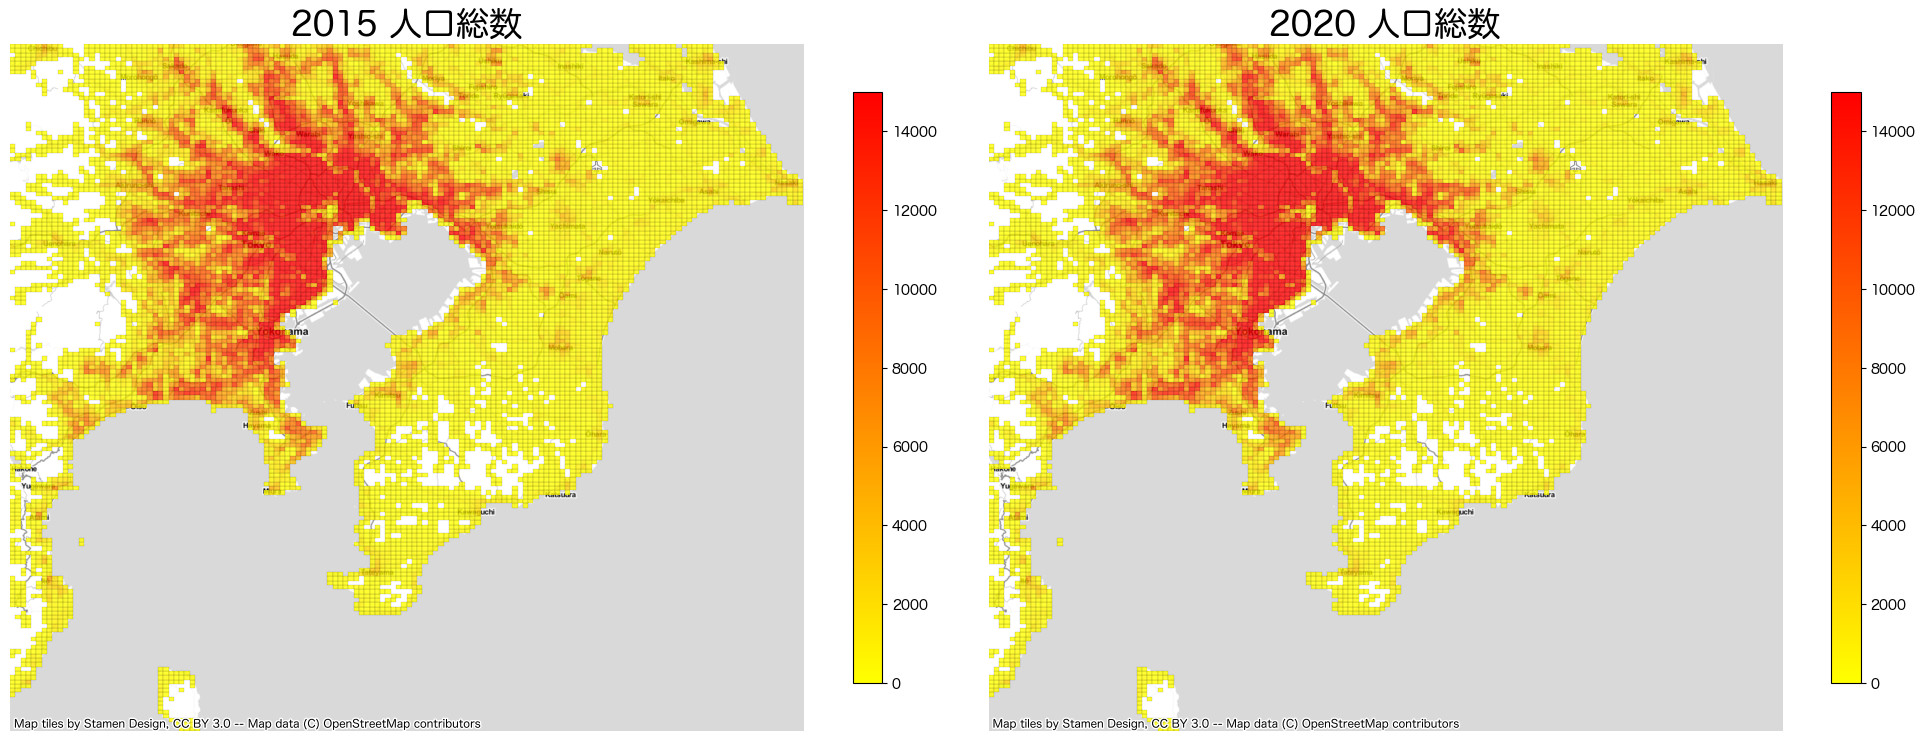

In [34]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
chibamesh.plot(ax = ax[0], # 左のマップ
    column='T000846001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# 2020 population
chibamesh.plot(ax = ax[1], # 右のマップ
    column='T001100001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015 人口総数',fontsize=24); # 左
ax[1].set_title('2020 人口総数',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = chibamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右

In [35]:
# create a new field
chibamesh['pop_change_2015_2020'] = np.nan

In [36]:
# create a new field with null values
chibamesh['pop_change_2015_2020'] = np.nan
chibamesh['pop_percent_change_2015_2020'] = np.nan

In [37]:
# calculate population change 【人口推移】
chibamesh['pop_change_2015_2020'] = chibamesh['T001100001']-chibamesh['T000846001']


In [38]:
# calculate population percent change【人口割合の変化】
chibamesh['pop_percent_change_2015_2020'] = chibamesh['pop_percent_change_2015_2020']/chibamesh['T000846001']*100

In [39]:
# check!
chibamesh[['KEY_CODE','T000846001','T001100001','pop_change_2015_2020','pop_percent_change_2015_2020']].sample(5)

KEY_CODE  T000846001  T001100001  pop_change_2015_2020   
9878  53407083.0      1264.0      1330.0                  66.0  \
8402  53404407.0       259.0       264.0                   5.0   
8703  53405076.0       150.0       150.0                   0.0   
215   52393082.0         8.0         9.0                   1.0   
160   52393000.0       122.0       113.0                  -9.0   

      pop_percent_change_2015_2020  
9878                           NaN  
8402                           NaN  
8703                           NaN  
215                            NaN  
160                            NaN

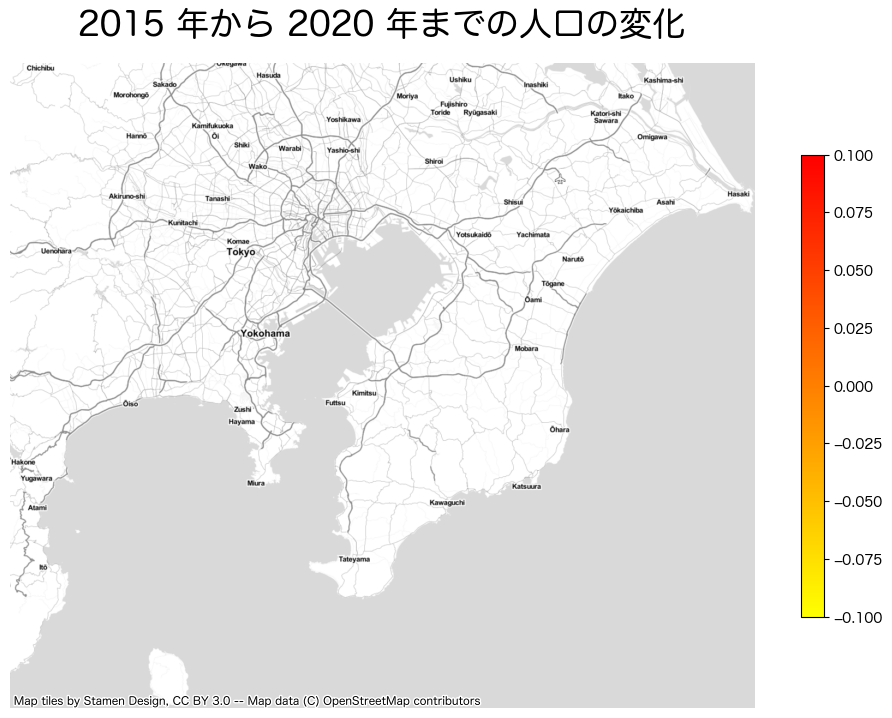

In [40]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12)) # 一つのマップなのでnrows,ncols=1

# 2015-2020 population change
chibamesh.plot(ax = ax,
        column='pop_percent_change_2015_2020',
        legend=True,
        legend_kwds={'shrink': 0.5},
        cmap='autumn_r',
        edgecolor='black',
        linewidth=0.1,
        alpha=0.8,)

# hide axes
ax.axis('off')

# title
ax.set_title('2015 年から 2020 年までの人口の変化',fontsize=24, pad=20);

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = chibamesh.total_bounds

# Set the plot limits based on the total bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

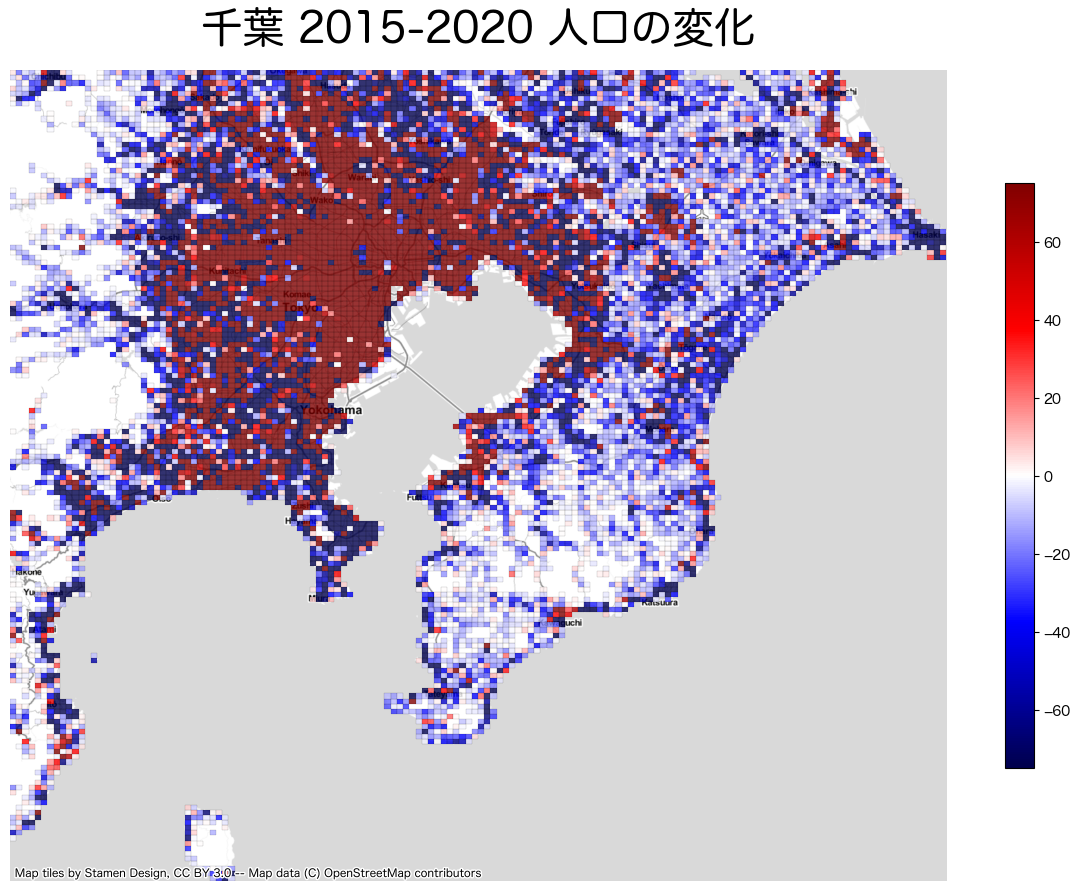

In [41]:
# population map
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))

# 2015-2020 population change
chibamesh.plot(ax = ax,
    column='pop_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.5},
         cmap='seismic',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=-75, # vminとvmaxが同じことによって、中間値がゼロになる
         vmax=75
         )

# hide axes
ax.axis('off')

# title
ax.set_title('千葉 2015-2020 人口の変化',fontsize=30, pad=20)

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = chibamesh.total_bounds

# Set the plot limits based on the total bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)


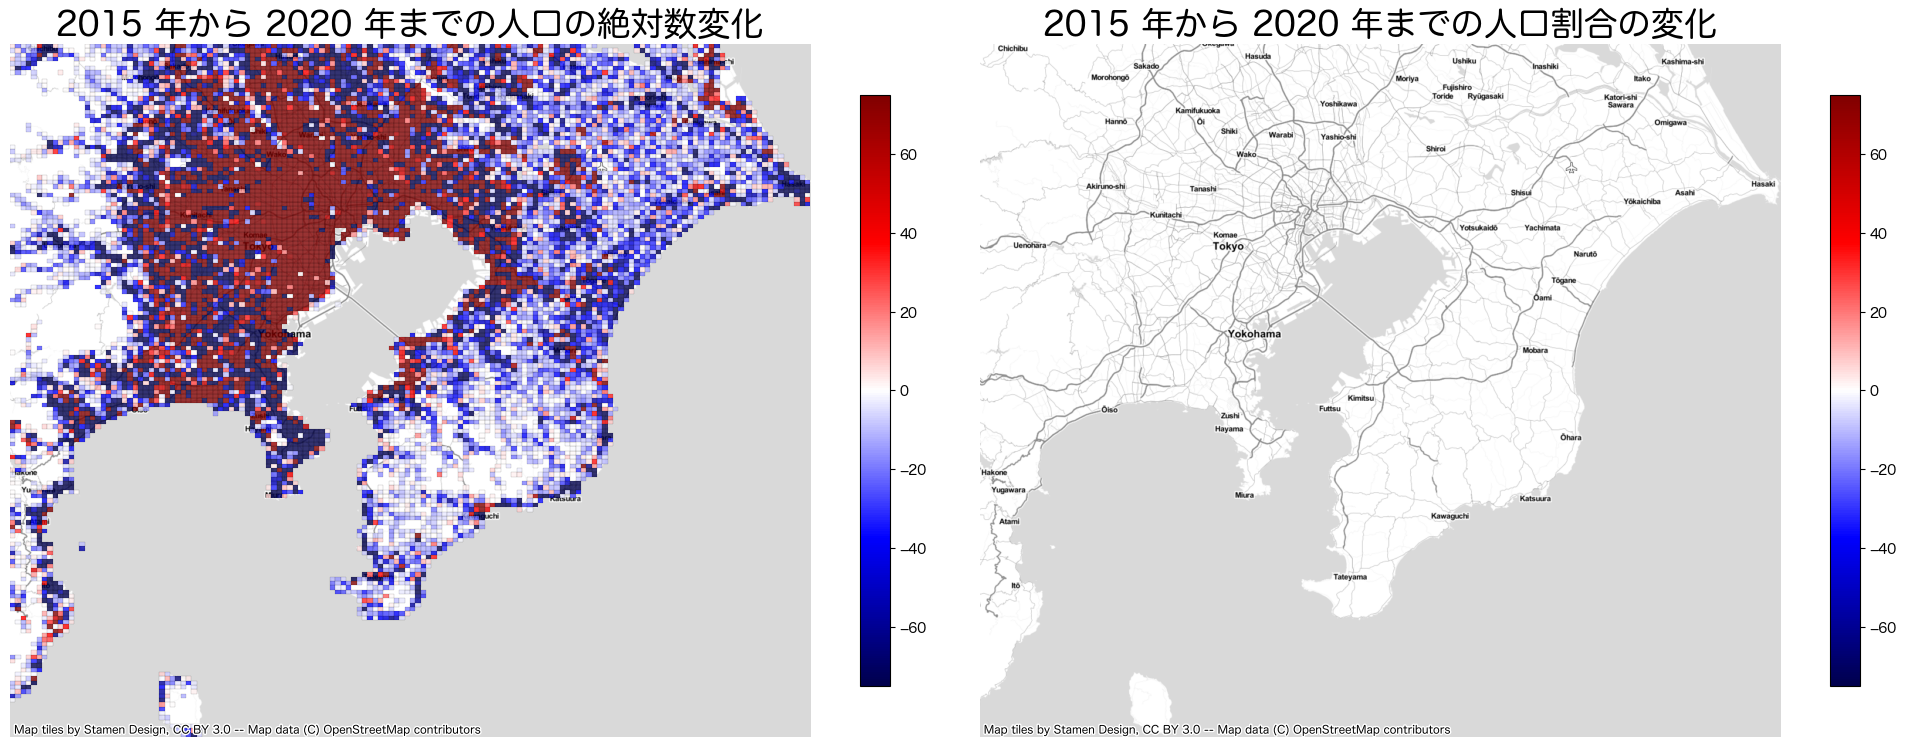

In [42]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
chibamesh.plot(ax = ax[0], # 左のマップ
    column='pop_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='seismic',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=-75, # vminとvmaxが同じことによって、中間値がゼロになる
         vmax=75
)

# 2020 population
chibamesh.plot(ax = ax[1], # 右のマップ
    column='pop_percent_change_2015_2020',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='seismic',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=-75, # vminとvmaxが同じことによって、中間値がゼロになる
         vmax=75
)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015 年から 2020 年までの人口の絶対数変化',fontsize=24); # 左
ax[1].set_title('2015 年から 2020 年までの人口割合の変化',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = chibamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右